In [1]:
 #import modules
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

In [2]:
crime = read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)  
crime_data = concat(crime, ignore_index=True)  

# print data's shape
crime_data.shape


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1177790, 22)

In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177790 entries, 0 to 1177789
Data columns (total 22 columns):
ID                      1177790 non-null object
Case Number             1177785 non-null object
Date                    1177786 non-null object
Block                   1177786 non-null object
IUCR                    1177786 non-null object
Primary Type            1177786 non-null object
Description             1177786 non-null object
Location Description    1173161 non-null object
Arrest                  1177785 non-null object
Domestic                1177785 non-null object
Beat                    1177785 non-null float64
District                1177784 non-null float64
Ward                    1167818 non-null float64
Community Area          1167875 non-null float64
FBI Code                1177785 non-null object
X Coordinate            1110978 non-null float64
Y Coordinate            1110978 non-null float64
Year                    1177785 non-null float64
Updated On      

In [4]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001.0,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017.0,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [5]:
# convert dates to pandas datetime format
crime_data.Date = pd.to_datetime(crime_data.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crime_data.index = pd.DatetimeIndex(crime_data.Date)

### Having a look at the null values in our dataset

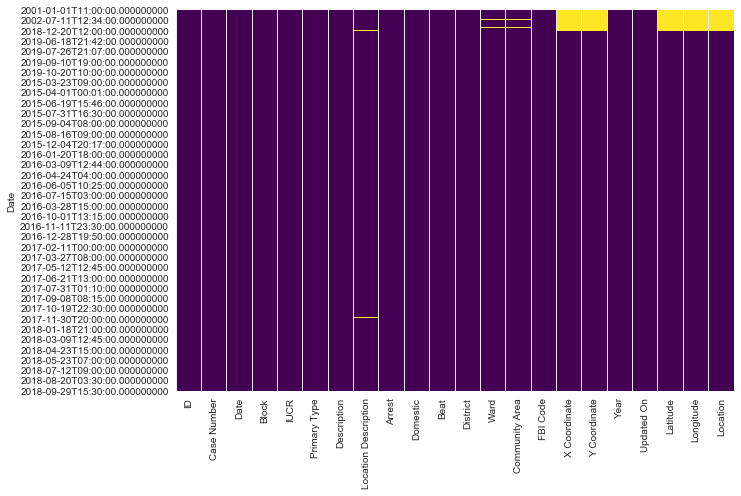

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(crime_data.isnull(), cbar = False, cmap = 'viridis')

#### Location discription along with number of crimes at that loc

In [7]:
pd.value_counts(crime_data['Location Description'])[:]

STREET         266729
RESIDENCE      201101
APARTMENT      147358
SIDEWALK       102743
OTHER           50996
                ...  
HOTEL               1
C{                  1
WOODED AREA         1
TRAILER             1
COACH HOUSE         1
Name: Location Description, Length: 136, dtype: int64

### Looking at top 10 crime Locations

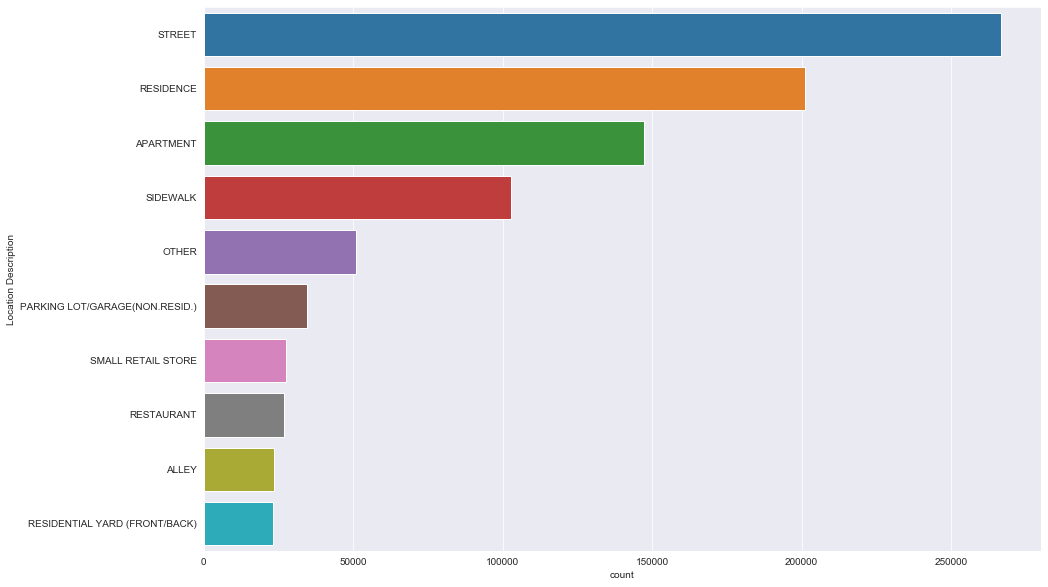

In [8]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crime_data, order = crime_data['Location Description'].value_counts().iloc[:10].index)

#### Crimes along with their occurence 

In [9]:
pd.value_counts(crime_data['Primary Type'])[:]

THEFT                                278871
BATTERY                              216714
CRIMINAL DAMAGE                      125798
DECEPTIVE PRACTICE                    84176
ASSAULT                               83726
OTHER OFFENSE                         74055
NARCOTICS                             69197
BURGLARY                              54922
MOTOR VEHICLE THEFT                   46685
ROBBERY                               45971
CRIMINAL TRESPASS                     28508
WEAPONS VIOLATION                     19240
OFFENSE INVOLVING CHILDREN            11777
CRIM SEXUAL ASSAULT                    8004
PUBLIC PEACE VIOLATION                 7195
SEX OFFENSE                            5619
INTERFERENCE WITH PUBLIC OFFICER       5092
PROSTITUTION                           4155
ARSON                                  1992
LIQUOR LAW VIOLATION                   1177
GAMBLING                               1129
STALKING                                822
KIDNAPPING                      

### Looking at the top 10 crimes

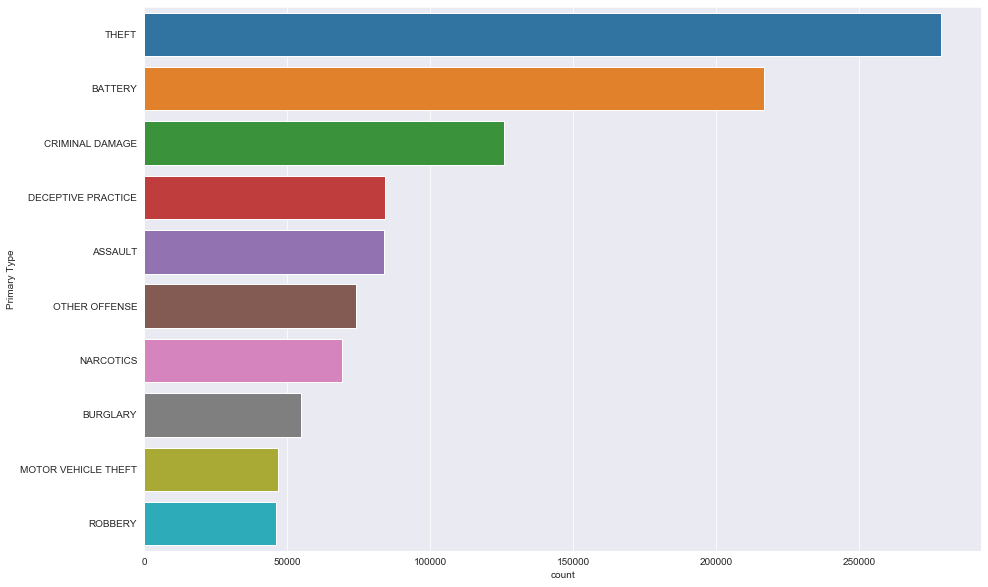

In [10]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = crime_data, order = crime_data['Primary Type'].value_counts().iloc[:10].index)

In [11]:
#loc_to_change  = list(crime_data['Location Description'].value_counts()[20:].index)
#desc_to_change = list(crime_data['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

#crime_data.loc[crime_data['Location Description'].isin(loc_to_change) , crime_data.columns=='Location Description'] = 'OTHER'
#crime_data.loc[crime_data['Description'].isin(desc_to_change) , crime_data.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [12]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
#crime_data['Primary Type']         = pd.Categorical(crime_data['Primary Type'])
#crime_data['Location Description'] = pd.Categorical(crime_data['Location Description'])
#crime_data['Description']          = pd.Categorical(crime_data['Description'])

# Crime Pattern

### Checing the pattern of No. of crimes per month

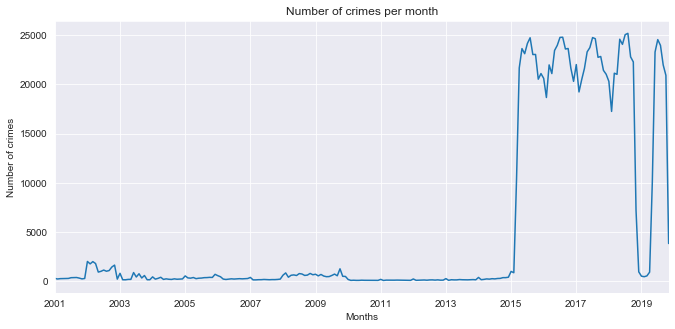

In [13]:
plt.figure(figsize=(11,5))
crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

### Total crimes over the years

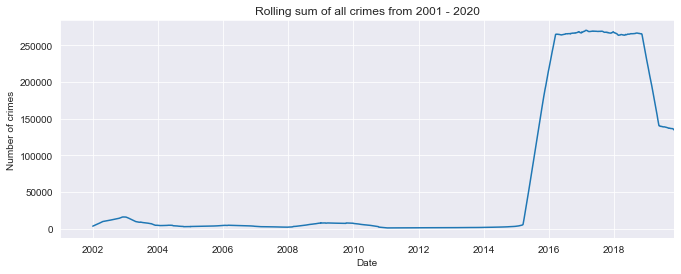

In [14]:
plt.figure(figsize=(11,4))
crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2020')
plt.ylabel('Number of crimes')
plt.show()

### Looking at each crime type over the years 

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


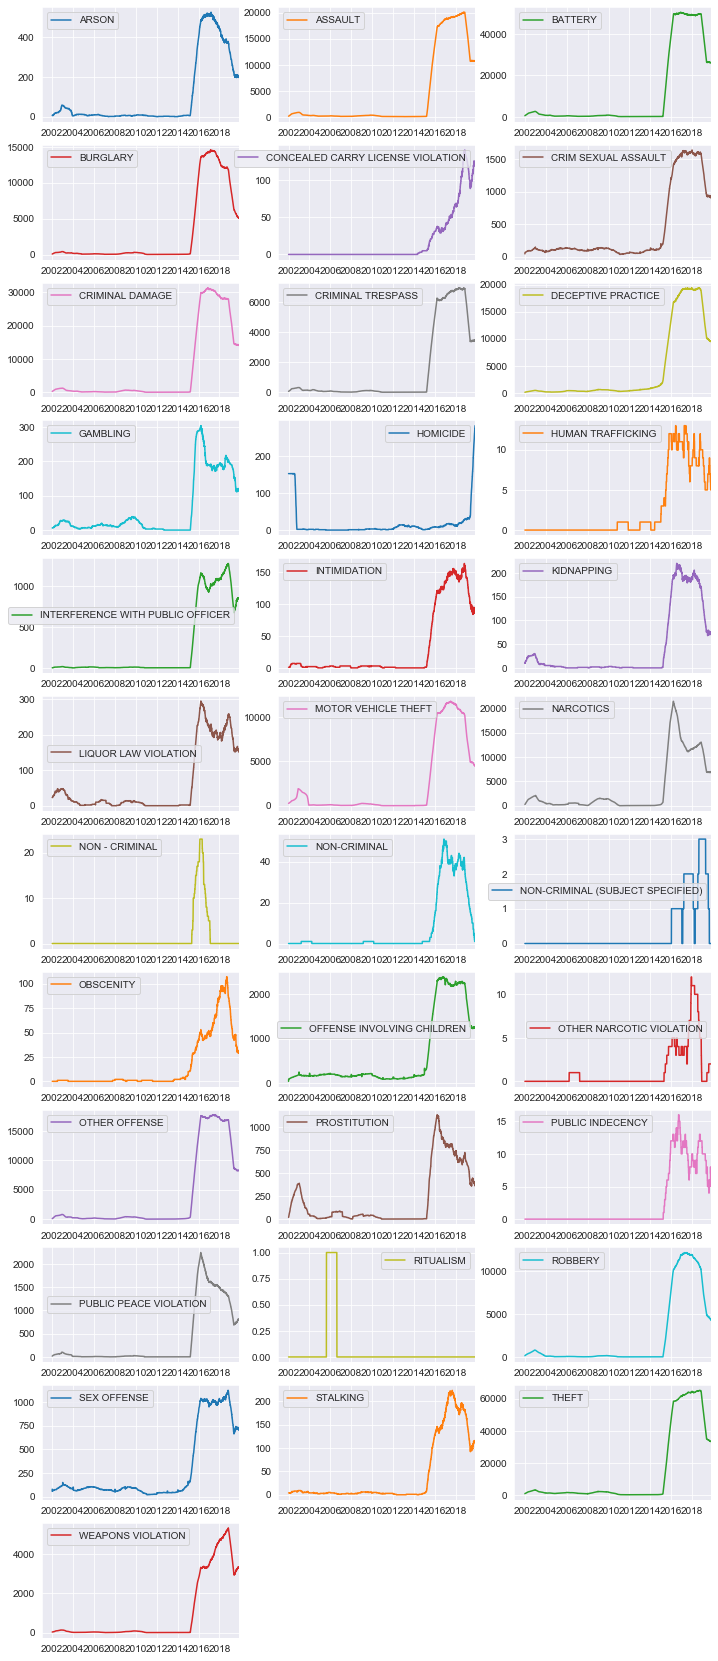

In [15]:
crime_data_count_date = crime_data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crime_data.index.date, fill_value=0)
crime_data_count_date.index = pd.DatetimeIndex(crime_data_count_date.index)
x = crime_data_count_date.rolling(365).sum()
display(x)
plo = crime_data_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)




### Number of crimes each day of the week

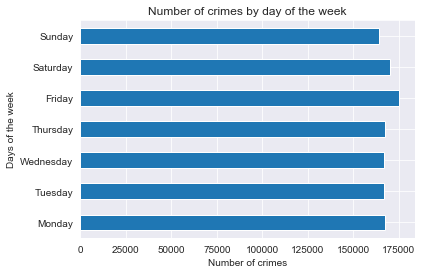

In [58]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_data.groupby([crime_data.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

### Number of crimes by month

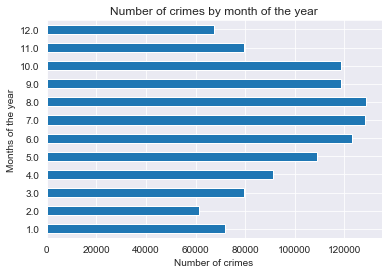

In [59]:
crime_data.groupby([crime_data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

In [60]:

crimes = crime_data['Primary Type'].sort_values().unique()
#crimes, len(crimes)

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'All Crime Distribution per District')

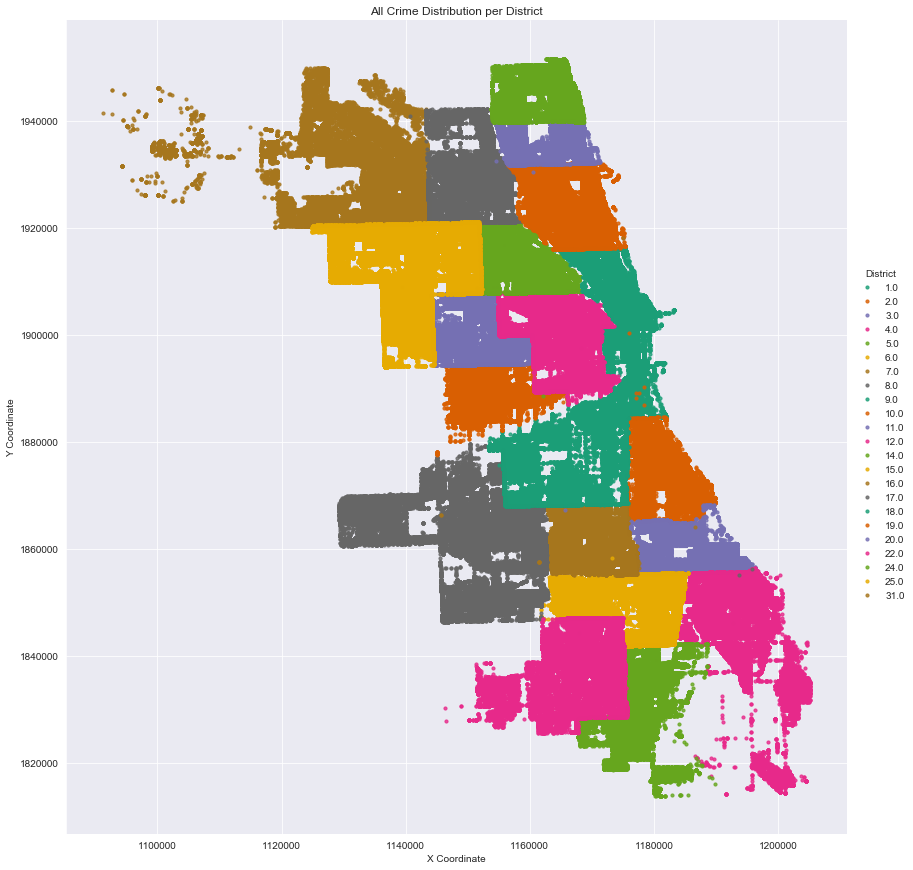

In [61]:
# Created a scatter plot of X and Y coordinates vs all crime data available in the dataset

crime_data = crime_data.loc[(crime_data['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

In [62]:
# create and preview dataframe containing crimes associated with gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
Date,,,,,,,
2006-10-17 13:05:00,2006-10-17 13:05:00,NARCOTICS,True,False,15.0,NaN,NaN
2014-07-16 10:50:00,2014-07-16 10:50:00,NARCOTICS,True,False,3.0,NaN,NaN
2014-05-30 11:06:56,2014-05-30 11:06:56,NARCOTICS,True,False,11.0,NaN,NaN
2014-01-22 06:00:00,2014-01-22 06:00:00,NARCOTICS,True,False,11.0,NaN,NaN
2017-11-20 18:20:00,2017-11-20 18:20:00,NARCOTICS,True,False,8.0,NaN,NaN


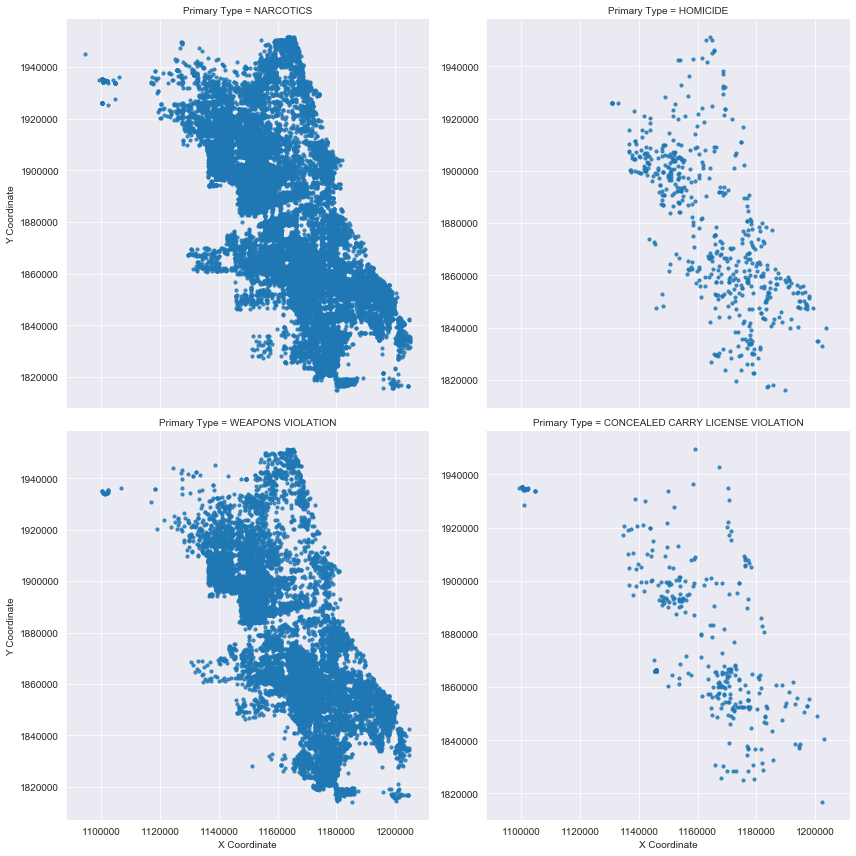

In [63]:
# geographical distribution scatter plots by crime
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

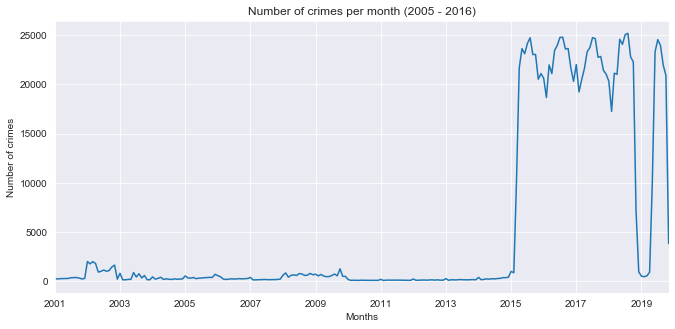

In [67]:
plt.figure(figsize=(11,5))
crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

### Specific public peace violations

In [69]:
df_public_peace =  crime_data[crime_data['Primary Type'] == 'PUBLIC PEACE VIOLATION']
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()


,Counts,Description
0,5082,RECKLESS CONDUCT
1,574,BOMB THREAT
2,439,OTHER VIOLATION
3,389,ARSON THREAT
4,313,FALSE POLICE REPORT


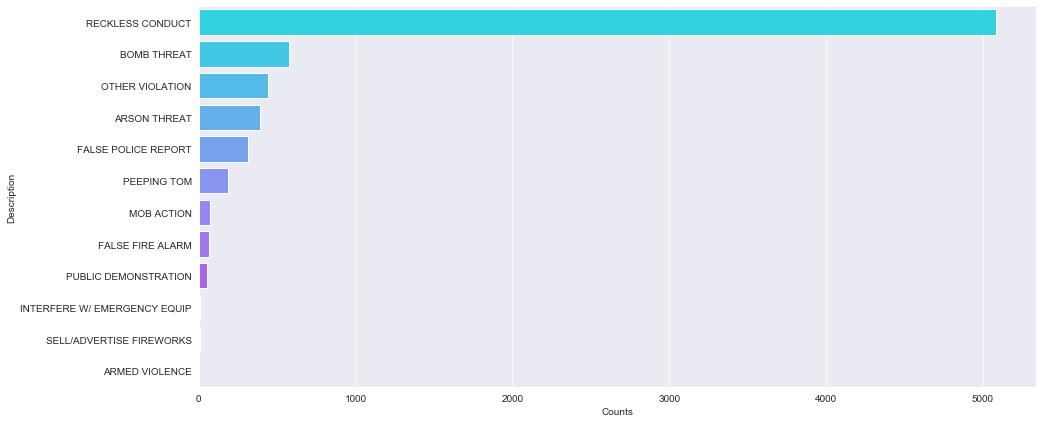

In [70]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")